<a href="https://colab.research.google.com/github/Sujith-Dwarsala/Weather-ML-RNN/blob/main/RNN_Rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/weatherAUS.csv')

In [ ]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
#Number of Categorical features
cf = [i for i in dataset.columns if dataset[i].dtype == 'O']
print("Number of Categorical Features: {}".format(len(cf)))
print("Categorical Features: ", cf)

Number of Categorical Features: 7
Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
#Number of Numerical features
nf = [j for j in dataset.columns if dataset[j].dtype != 'O']
print("Number of Numerical Features: {}".format(len(nf)))
print("Numerical Features: ", nf)

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
#Extracting the dependent column of the dataset
y_true = dataset.iloc[:,-1].values
y_true

array(['No', 'No', 'No', ..., 'No', 'No', nan], dtype=object)

In [ ]:
y_true = y_true.reshape(-1,1) #made into a compatibe 2D array



In [ ]:
#Checking cardinality of parameters
for x in cf:
   unique_x = len(dataset[x].unique())
   print("Uniqueness of {} are: {}".format(x, unique_x))

Uniqueness of Date are: 3436
Uniqueness of Location are: 49
Uniqueness of WindGustDir are: 17
Uniqueness of WindDir9am are: 17
Uniqueness of WindDir3pm are: 17
Uniqueness of RainToday are: 3
Uniqueness of RainTomorrow are: 3


In [ ]:
#Creating new dataset with important parameters
X = dataset.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
X

array([['Albury', 13.4, 22.9, ..., 16.9, 21.8, 'No'],
       ['Albury', 7.4, 25.1, ..., 17.2, 24.3, 'No'],
       ['Albury', 12.9, 25.7, ..., 21.0, 23.2, 'No'],
       ...,
       ['Uluru', 5.4, 26.9, ..., 12.5, 26.1, 'No'],
       ['Uluru', 7.8, 27.0, ..., 15.1, 26.0, 'No'],
       ['Uluru', 14.9, nan, ..., 15.0, 20.9, 'No']], dtype=object)

In [ ]:
#Removal of outliers
remove_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for i in remove_outliers:
    q1 = dataset[i].quantile(0.25)
    q3 = dataset[i].quantile(0.75)
    IQR = q3-q1
    LL = q1 - (IQR*1.5)
    UL = q3 + (IQR*1.5)
    dataset.loc[dataset[i]<LL,i] = LL
    dataset.loc[dataset[i]>UL,i] = UL

In [ ]:
print(LL,UL)

1.9000000000000057 41.099999999999994


In [ ]:
# Imputing the missing values  using the most frequent value
rf_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X = rf_imputer.fit_transform(X)
X

array([['Albury', 13.4, 22.9, ..., 16.9, 21.8, 'No'],
       ['Albury', 7.4, 25.1, ..., 17.2, 24.3, 'No'],
       ['Albury', 12.9, 25.7, ..., 21.0, 23.2, 'No'],
       ...,
       ['Uluru', 5.4, 26.9, ..., 12.5, 26.1, 'No'],
       ['Uluru', 7.8, 27.0, ..., 15.1, 26.0, 'No'],
       ['Uluru', 14.9, 20.0, ..., 15.0, 20.9, 'No']], dtype=object)

In [ ]:
y_true = rf_imputer.fit_transform(y_true)
y_true

array([['No'],
       ['No'],
       ['No'],
       ...,
       ['No'],
       ['No'],
       ['No']], dtype=object)

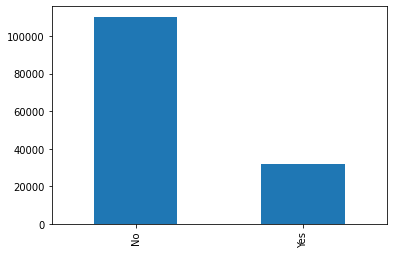

In [ ]:
#Analysing data
dataset['RainTomorrow'].value_counts().plot(kind='bar')
plt.show()

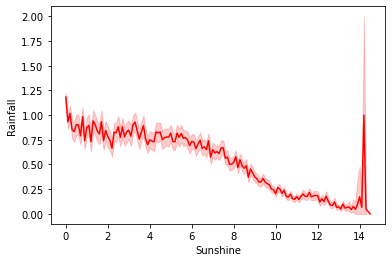

In [ ]:
#Relationship between sunshine and Rainfall
# plt.scatter(dataset['Sunshine'],dataset['Rainfall'],color='g', alpha=0.6)
import seaborn as sns
sns.lineplot(data=dataset,x='Sunshine',y='Rainfall',color='red')
plt.show()

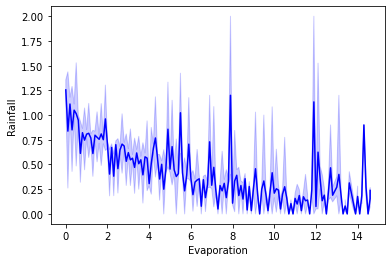

In [ ]:
#Relationship between Evaporation and Rainfall
sns.lineplot(data=dataset,x='Evaporation',y='Rainfall',color='blue')
plt.show()

In [ ]:
#Encoding categorical features
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
X[:,0] = label_encoder.fit_transform(X[:,0])
X[:,4] = label_encoder.fit_transform(X[:,4])
X[:,6] = label_encoder.fit_transform(X[:,6])
X[:,7] = label_encoder.fit_transform(X[:,7])
X[:,-1] = label_encoder.fit_transform(X[:,-1])
y_true[:,-1] = label_encoder.fit_transform(y_true[:,-1])

In [ ]:
print(X)

[[2 13.4 22.9 ... 16.9 21.8 0]
 [2 7.4 25.1 ... 17.2 24.3 0]
 [2 12.9 25.7 ... 21.0 23.2 0]
 ...
 [41 5.4 26.9 ... 12.5 26.1 0]
 [41 7.8 27.0 ... 15.1 26.0 0]
 [41 14.9 20.0 ... 15.0 20.9 0]]


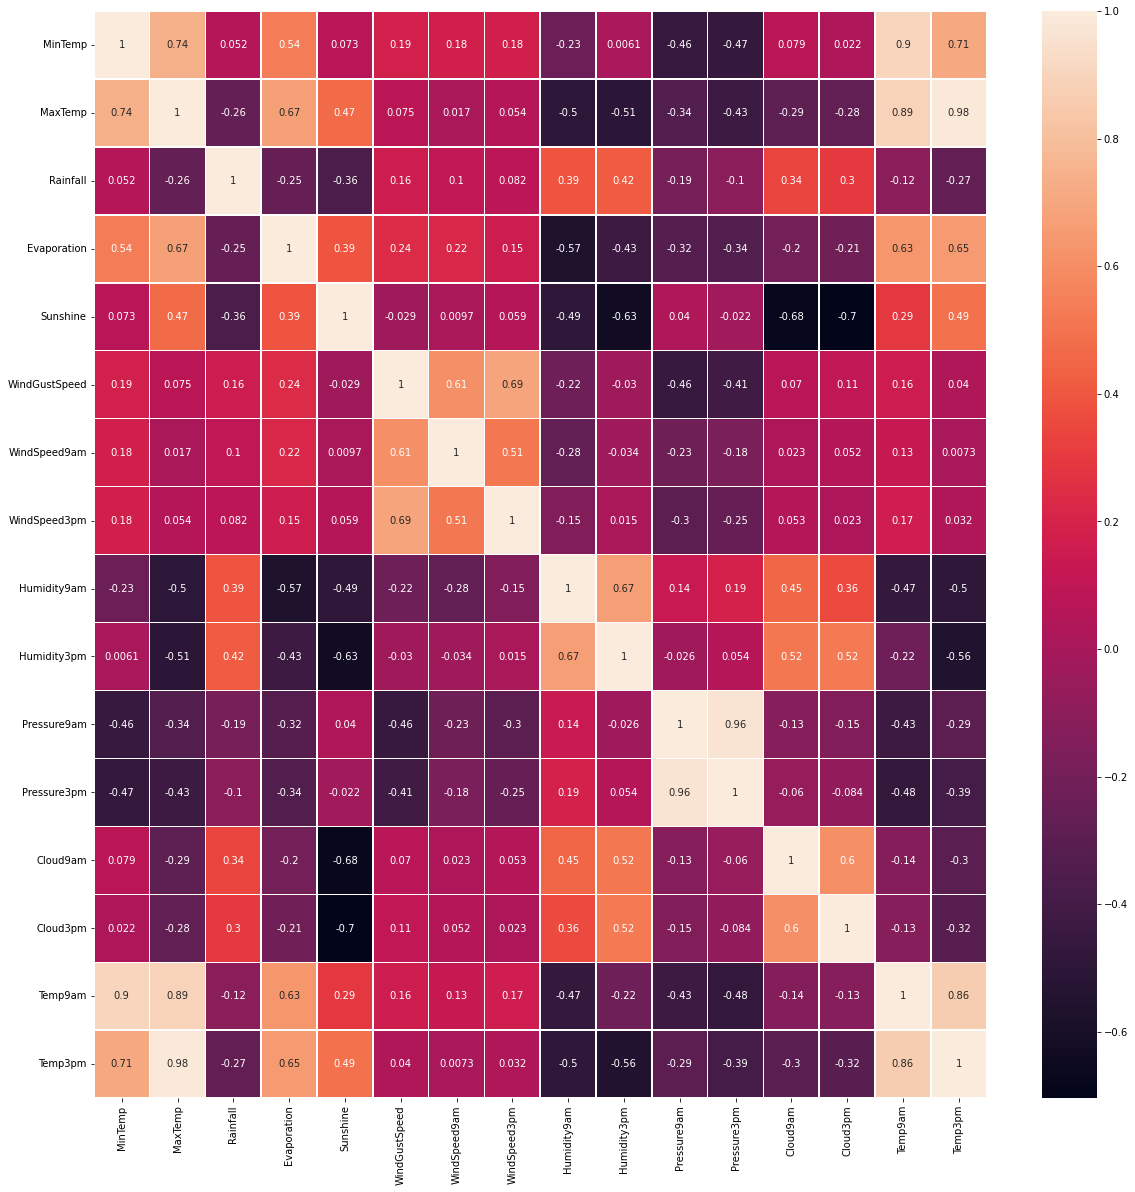

In [ ]:
#Correlation between variables
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(), linewidths=0.5, annot=True)
plt.show()

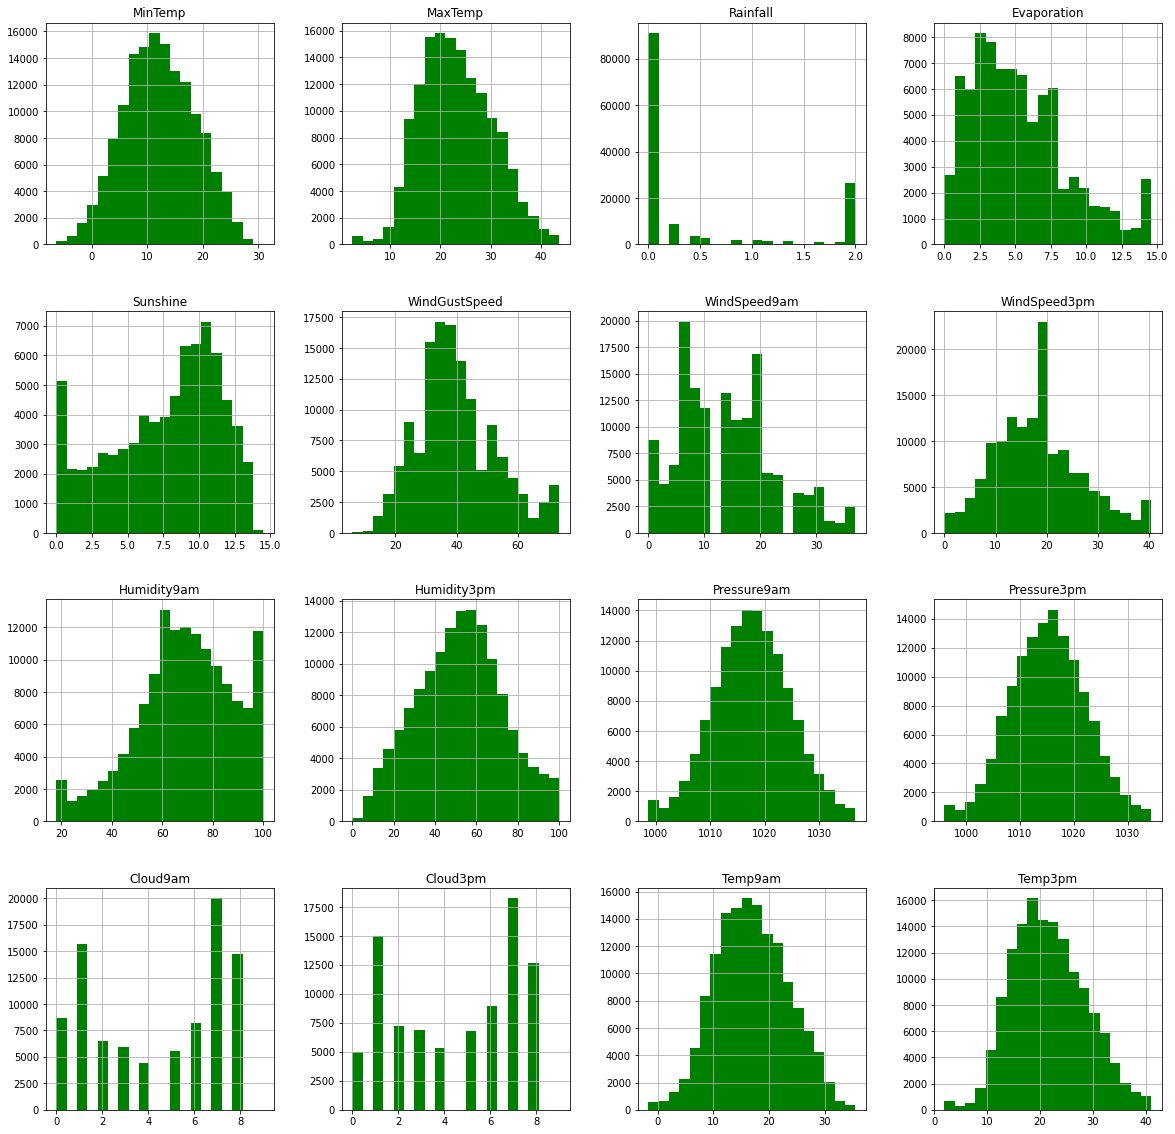

In [ ]:
dataset.hist(bins=20,figsize=(20,20),color='g')
plt.show()

In [ ]:
df=pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,2,13.4,22.9,0.6,13,44,13,14,20,24,71,22,1007.7,1007.1,8,7,16.9,21.8,0
1,2,7.4,25.1,0,14,44,6,15,4,22,44,25,1010.6,1007.8,7,7,17.2,24.3,0
2,2,12.9,25.7,0,15,46,13,15,19,26,38,30,1007.6,1008.7,7,2,21,23.2,0
3,2,9.2,28,0,4,24,9,0,11,9,45,16,1017.6,1012.8,7,7,18.1,26.5,0
4,2,17.5,32.3,1,13,41,1,7,7,20,82,33,1010.8,1006,7,8,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.4,0,0,31,9,1,13,11,51,24,1024.6,1020.3,7,7,10.1,22.4,0
145456,41,3.6,25.3,0,6,22,9,3,13,9,56,21,1023.5,1019.1,7,7,10.9,24.5,0
145457,41,5.4,26.9,0,3,37,9,14,9,9,53,24,1021,1016.8,7,7,12.5,26.1,0
145458,41,7.8,27,0,9,28,10,3,13,7,51,24,1019.4,1016.5,3,2,15.1,26,0


In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
     #-3 to +3

In [ ]:
#Splitting into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y_true,test_size=0.25,random_state=0)

In [ ]:
print(X_train)

[[-1.1099814   1.46354032  1.1990574  ...  2.07921252  1.175541
  -0.52979545]
 [-0.12605029 -0.49975102 -0.78842921 ... -0.54126805 -0.93969215
  -0.52979545]
 [ 0.36591527 -0.97094094 -0.61928141 ... -0.86688989 -0.56040897
   1.88752093]
 ...
 [ 1.0687232   0.75675544  0.93124006 ...  1.10234698  1.07342629
  -0.52979545]
 [ 0.57675765 -0.04426743 -0.16822062 ...  0.01694083 -0.28324049
   1.88752093]
 [ 1.63096955 -0.0285611  -0.91529006 ... -0.35519842 -0.76463838
  -0.52979545]]


In [ ]:
Y_train

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=object)

In [ ]:
X_train.shape
# X_test.shape

(109095, 19)

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(19, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2000      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 22,301
Trainable params: 22,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
import numpy as np

In [ ]:
X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

In [ ]:
X_test = np.asarray(X_test).astype(np.float32)
Y_test = np.asarray(Y_test).astype(np.float32)
X_train = np.asarray(X_train).astype(np.float32)
Y_train = np.asarray(Y_train).astype(np.float32)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_test = scaler.fit_transform(X_test)
Y_test = scaler.fit_transform(Y_test)
X_train = scaler.fit_transform(X_train)
Y_train = scaler.fit_transform(Y_train)

In [ ]:
epochs_hist = model.fit(X_train,Y_train,epochs=10,batch_size=50,validation_split=0.5)

Epoch 1/10
1091/1091 [==============================] - 4s 3ms/step - loss: 0.1202 - accuracy: 0.8361 - val_loss: 0.1163 - val_accuracy: 0.8397
Epoch 2/10
1091/1091 [==============================] - 3s 3ms/step - loss: 0.1151 - accuracy: 0.8417 - val_loss: 0.1144 - val_accuracy: 0.8416
Epoch 3/10
1091/1091 [==============================] - 3s 3ms/step - loss: 0.1138 - accuracy: 0.8437 - val_loss: 0.1146 - val_accuracy: 0.8412
Epoch 4/10
1091/1091 [==============================] - 3s 3ms/step - loss: 0.1132 - accuracy: 0.8449 - val_loss: 0.1135 - val_accuracy: 0.8428
Epoch 5/10
1091/1091 [==============================] - 3s 3ms/step - loss: 0.1124 - accuracy: 0.8459 - val_loss: 0.1162 - val_accuracy: 0.8409
Epoch 6/10
1091/1091 [==============================] - 3s 3ms/step - loss: 0.1119 - accuracy: 0.8474 - val_loss: 0.1126 - val_accuracy: 0.8440
Epoch 7/10
1091/1091 [==============================] - 3s 3ms/step - loss: 0.1115 - accuracy: 0.8473 - val_loss: 0.1131 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(X_test,Y_test)

1137/1137 [==============================] - 1s 1ms/step - loss: 0.1132 - accuracy: 0.8441


In [ ]:
Y_pred= model.predict(X_test).ravel()

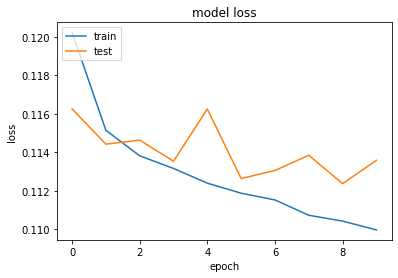

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

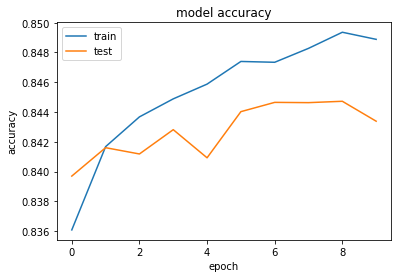

In [ ]:
plt.plot(epochs_hist.history['accuracy'])
plt.plot(epochs_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

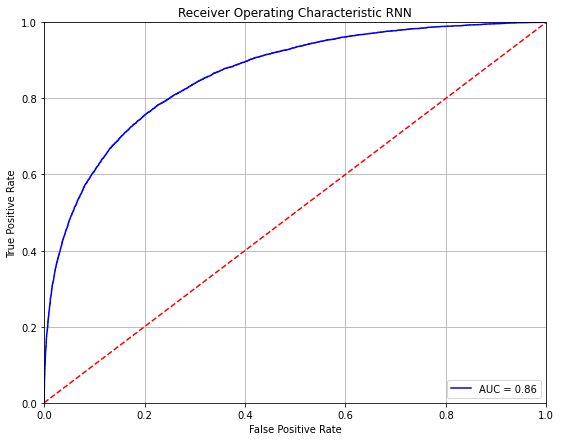

In [ ]:
import sklearn.metrics as metrics
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = metrics.roc_curve(Y_test, Y_pred)
auc_keras = metrics.auc(nn_fpr_keras, nn_tpr_keras)
# plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
roc_auc = metrics.auc(nn_fpr_keras, nn_tpr_keras)
plt.figure(figsize=(9,7))
plt.plot(nn_fpr_keras, nn_tpr_keras, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic RNN')
plt.grid()

plt.show()